#### IMPORT

In [1]:
import time
import pandas as pd
import os
import pyperclip as pc
import pyautogui 
import re
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np

#### FUNCTIONS

In [2]:
def Convert_int(value): #Function for convert STRING in INT values
    if isinstance(value, str):
        try:
            return int(value.replace('%', '')) #Remove '%'
        except ValueError:
            return pd.NA
    elif isinstance(value, (int, float)):
        return int(value)
    else:
        return pd.NA

def Add_values(ax, values): #Function to add values ​​above the graph bars
    for i, value in enumerate(values):
        data = f'{value:.2f}'
        ax.text(i, value, data, ha='center', va='bottom')

def Team_alone(org, table): #Function to create bar graph showing team statistics
    org_data = table[table['TIME'] == org]
    org_mean = org_data.mean(numeric_only=True)
    player_r = org_data.groupby('PLAYER')['R'].sum()
    player_kd = org_data.groupby('PLAYER')['KD'].sum()
    player_hs = org_data.groupby('PLAYER')['HS'].sum()
    player_fk = org_data.groupby('PLAYER')['FK'].sum()
    player_fd = org_data.groupby('PLAYER')['FD'].sum()

    print(f'TEAM STATISTICS {org}\n')

    for column, value in org_mean.items():
        if column == 'KMAX':
            print(f'{column}: {org_data[column].max()}')
        elif column == 'RND':
            pass
        else:
            print(f'{column}: {value:.2f}')

    mosaic = 'ABC;DDE'
    fig = plt.figure(figsize=(15, 10))
    espaco = {'wspace': 0.3, 'hspace': 0.3}
    axs = fig.subplot_mosaic(mosaic, gridspec_kw=espaco)

    colors = plt.get_cmap('Dark2').colors

    axs['A'].bar(player_r.index, player_r.values, color=colors)
    axs['A'].set_title('RATING', fontsize=12)
    Add_values(axs['A'], player_r.values)
    axs['A'].tick_params(axis='both', length=0, labelsize='10')
    axs['A'].tick_params(axis='x', rotation=40) 
    axs['A'].spines['top'].set_visible(False)
    axs['A'].spines['right'].set_visible(False)

    axs['B'].bar(player_kd.index, player_kd.values, color=colors)
    axs['B'].set_title('KD (Kill/Death)', fontsize=12)
    Add_values(axs['B'], player_kd.values)
    axs['B'].tick_params(axis='both', length=0, labelsize='10')
    axs['B'].tick_params(axis='x', rotation=40) 
    axs['B'].spines['top'].set_visible(False)
    axs['B'].spines['right'].set_visible(False)

    axs['C'].bar(player_hs.index, player_hs.values, color=colors)
    axs['C'].set_title('HS %', fontsize=12)
    Add_values(axs['C'], player_hs.values)
    axs['C'].tick_params(axis='both', length=0, labelsize='10')
    axs['C'].tick_params(axis='x', rotation=40) 
    axs['C'].spines['top'].set_visible(False)
    axs['C'].spines['right'].set_visible(False)

    axs['D'].pie(player_fk, labels=[f'{player}: {value:.2f}' for player, value, in player_fk.items()], autopct='%1.1f%%')
    axs['D'].set_title('FK (First Kill)', fontsize=12)

    axs['E'].pie(player_fd, labels=[f'{player}: {value:.2f}' for player, value, in player_fd.items()], autopct='%1.1f%%')
    axs['E'].set_title('FD (First Death)', fontsize=12)
    
    plt.tight_layout(pad=2.0)

    fig.suptitle(f'TEAM STATISTICS{org}', fontsize=16)
    plt.show()

def Team_compared(number, table): #Function to create graphs to compare teams
    orgs = []
    means = { 'R': [], 'KD': [], 'HS': [], 'CL': [] }

    for i in range(number):
        org = input(f'What is the {i+1}º team?').upper()
        orgs.append(org)
        org_data = table[table['TIME'] == org]
        for key in means.keys():
            means[key].append(org_data[key].mean())

    colors = plt.get_cmap('Dark2').colors
    mosaic = 'AB;CD'
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 11), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})

    for ax, (key, values) in zip(axs.flat, means.items()):
        ax.bar(orgs, values, color=colors)
        ax.set_title(f'{key}', fontsize=12)
        Add_values(ax, values)
        ax.tick_params(axis='both', length=0, labelsize='10')
        ax.tick_params(axis='x', rotation=40)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

def Player_data(player, table): #Function to show a player statistics
    player = player.upper()
    lista_player = table[table['PLAYER'] == player]
    print(lista_player.iloc[0])

def Player_compared(number, table): #Function to create a graph to compare players 
    player_index = table.set_index('PLAYER')
    players = [input(f'{i+1}º player?').upper() for i in range(number)]

    players_data = {key: player_index.loc[players, key] for key in ['R', 'KD', 'KAST', 'HS', 'KMAX', 'CL', 'FK', 'FD'] }

    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 22), gridspec_kw={'wspace': 0.15, 'hspace': 0.23})
    colors = plt.get_cmap('Dark2').colors

    for ax, (key, values) in zip(axs.flat, players_data.items()):
        ax.bar(players, values, color=colors)
        ax.set_title(f'{key}', fontsize=12)
        Add_values(ax, values)
        ax.tick_params(axis='both', length=0)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    plt.show()

def Specific_data(data_action, table): #Function to create a graph with averages of specific data for the teams
    data_number = int(input('How many teams do you want to compare? (MAX 15)'))
    if data_number > 15:
        return print('LIMIT FOR TEAMS IS 15')
    colors = plt.get_cmap('Dark2').colors
    team_data = table.groupby('TIME')[data_action].mean()
    team_data_ordered = team_data.sort_values(ascending=False)

    plt.figure(figsize=(11, 6))
    graphic = team_data_ordered[:data_number].plot(kind='bar', color=colors)
    plt.title(f'TOP {data_number} TEAMS IN {data_action}', fontweight='bold')
    plt.tick_params(axis='both', length=0)
    plt.xticks(rotation=40)
    plt.xlabel('')
    Add_values(graphic, team_data_ordered[:data_number])
    plt.show()

#### OPEN EXCEL TABLE AND CONVERT VALUES

In [3]:
stats = pd.read_excel("stats_completo.xlsx") 

#Select data to convert from INT
stats['HS'] = stats['HS'].str.replace('%', '').apply(Convert_int)
stats['KAST'] = stats['KAST'].str.replace('%', '').apply(Convert_int)
stats['CL'] = stats['CL'].apply(Convert_int)
stats['PLAYER'] = stats['PLAYER'].str.upper()

#### MENU 

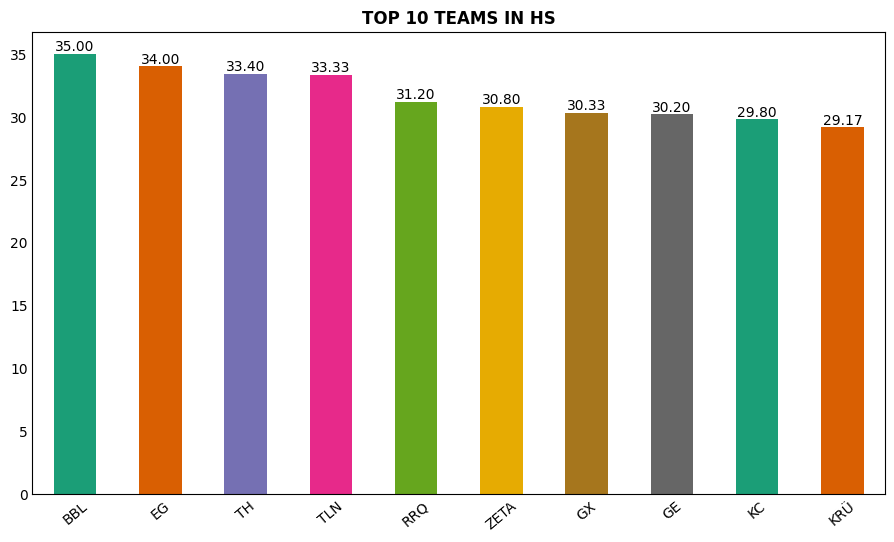

In [9]:
action = int(input('What you want?\n1. Team Statistics\n2. Compare Team Statistics\n3. Show a Player Statistics\n4. Compare Players Statistics\n5. Show the average of teams in a category\npesquisa pela abreviação dos times (exemplo: Lev, Sen, Gen)'))

if action == 1:
    org = input('Which Team?').upper()
    Team_alone(org, stats)
    
elif action == 2:
    number = int(input('How many teams do you want to compare?'))
    Team_compared(number, stats)

elif action == 3:
    player = input('Which player?')
    Player_data(player, stats)
        
elif action == 4:
    number = int(input('How many players do you want to compare?'))
    Player_compared(number, stats)

elif action == 5:
    data_action = input('Which data you want search?').upper()
    Specific_data(data_action, stats)
